In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf
import time

In [28]:
#a portfolio with greater volatility is a portfolio with higher risk
#high-risk portfolio
#consists of solely Super Micro-Computer (SMCI) which demonstrates higher volatility than Tesla (TSLA)

tickers = ["SMCI"]
start_date = dt.datetime.today() - dt.timedelta(days=100)
end_date = dt.datetime.today()
stock = yf.download(tickers,start=start_date,end=end_date)


[*********************100%***********************]  1 of 1 completed


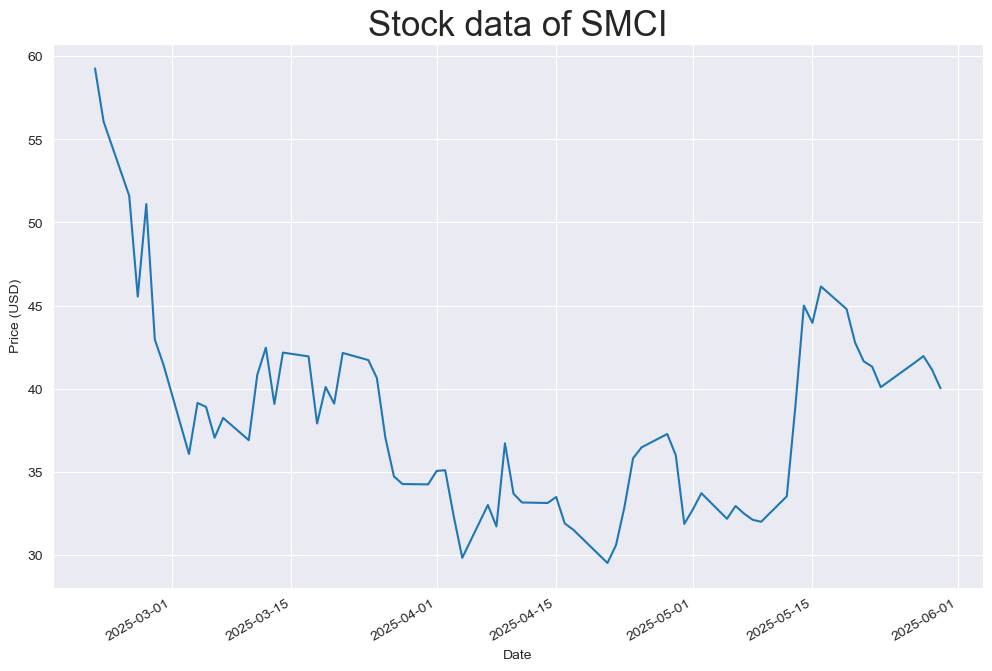

In [29]:
ticker = 'SMCI'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

In [30]:
#compare SMCI with another stock perceived as highly volatile
# eg TSLA 
# and another stock with low volatility eg PG
# below we compare their yearly volatilities by taking standard deviations of log daily returns then multiplying by sqrt(252)

tickers = ["SMCI", "TSLA", "PG"] 
start_date = dt.datetime.today() - dt.timedelta(days=100)
end_date = dt.datetime.today()
stock = yf.download(tickers,start=start_date,end=end_date)


[*********************100%***********************]  3 of 3 completed


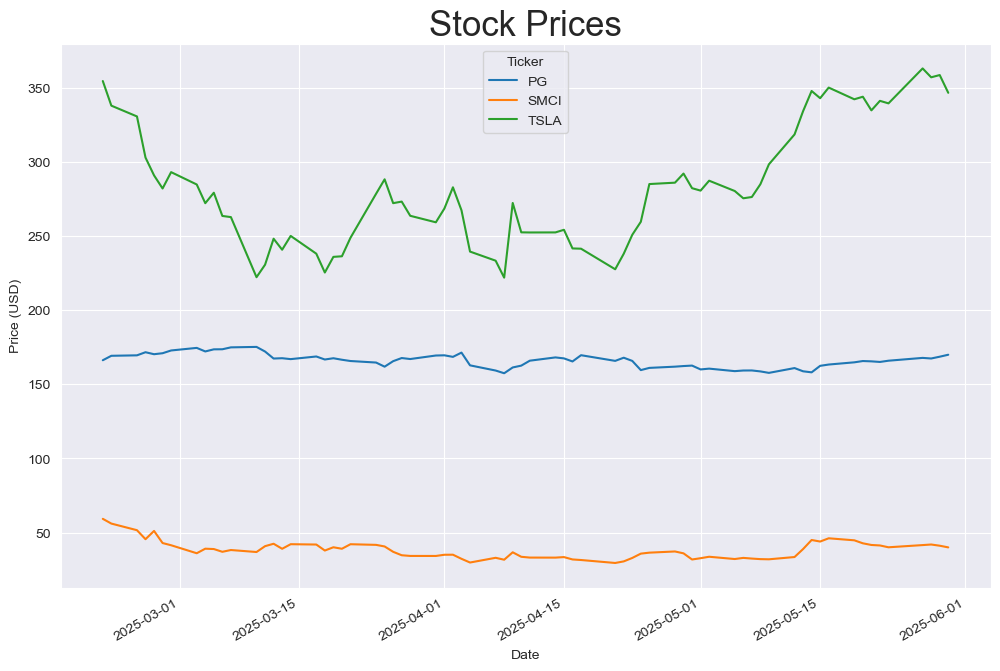

In [31]:
#stock prices plotted together
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 25)
plt.ylabel('Price (USD)')
plt.show()

In [32]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna() #clean data
#dictionary of standard deviations of daily return:
annual_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in tickers}

In [33]:
annual_volatility

{'SMCI': 1.0637274347623864,
 'TSLA': 0.8564688664740655,
 'PG': 0.2264428270904213}

In [40]:
#here are their cumulative returns
close = stock['Close']
normalized_returns = close/close.iloc[0]-1 #moves stock prices to a start of 0

normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])

stock = pd.concat([stock, normalized_returns], axis =1 )

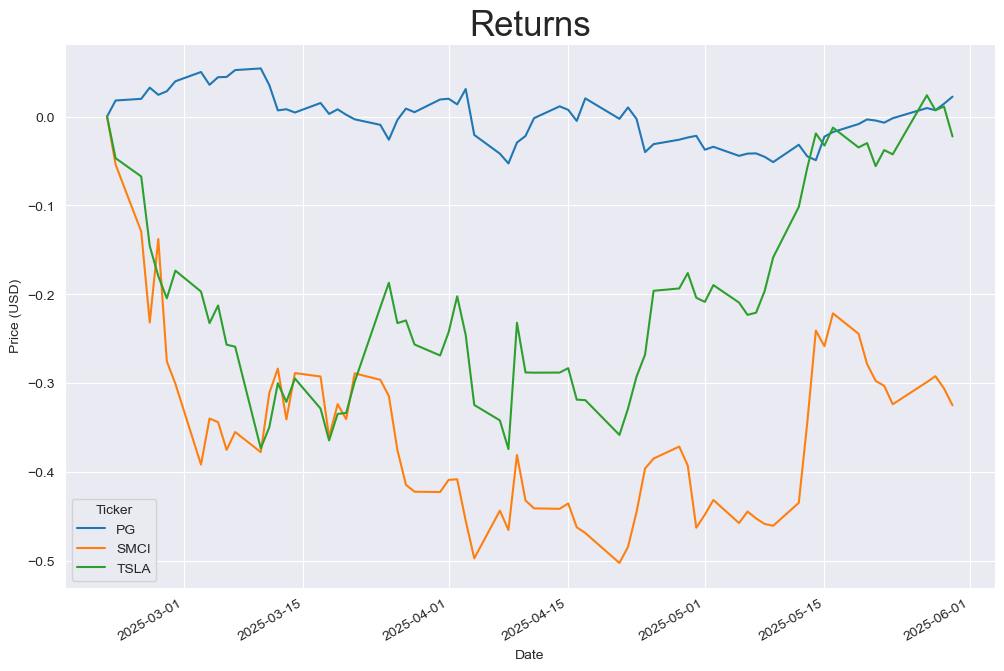

In [41]:
stock['Cumulative Return'].plot(figsize = (12,8))
plt.title(f'Returns', size = 25)
plt.ylabel('Price (USD)')
plt.show()

In [51]:
#now we construct a low-risk portfolio (ie portfolio variance is minimal and volatility low)
#mainly concentrating on low volatility stocks diversified across different sectors
#sectors are tech (MSFT), financial services (JPM), consumer defensive/staples (PG), communications (VZ),
#healthcare (JNJ), industrials (UNP), consumer discretionary(MCD) energy (XOM), 
#basic materials (APD), real estate (PSA), and utilities (DUK)
#select one stock from each sector respectively

low_risk_tickers = ['MSFT', 'JPM', 'PG', 'VZ', 'JNJ', 'UNP', 'MCD', 'XOM', 'APD', 'PSA', 'DUK']
start_date = dt.datetime.today()-dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

stock = yf.download(low_risk_tickers, start = start_date, end = end_date)



[*********************100%***********************]  11 of 11 completed


In [52]:
#daily returns and volatility of stocks in low-risk portfolio above

daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()
annualized_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in low_risk_tickers}
annualized_volatility

{'MSFT': 0.23269179605914778,
 'JPM': 0.23301009753110416,
 'PG': 0.16707593586945338,
 'VZ': 0.2296227140792833,
 'JNJ': 0.1761053122566966,
 'UNP': 0.21640930181590348,
 'MCD': 0.17663886967454773,
 'XOM': 0.22307686047055525,
 'APD': 0.28346467814167187,
 'PSA': 0.23277313075345996,
 'DUK': 0.1778307055843297}

In [53]:
#covariance matrix of low-risk portfolio
covariance_matrix = 252*((daily_returns).cov())
covariance_matrix

Ticker,APD,DUK,JNJ,JPM,MCD,MSFT,PG,PSA,UNP,VZ,XOM
Ticker,,,,,,,,,,,
APD,0.080513,0.011874,0.010866,0.019801,0.013210,0.012907,0.012555,0.022237,0.019111,0.014662,0.016557
DUK,0.011874,0.031687,0.013925,0.005914,0.011575,-0.004654,0.013521,0.018747,0.009463,0.017003,0.007546
JNJ,0.010866,0.013925,0.031075,0.006931,0.010466,-0.003581,0.011201,0.014401,0.010331,0.011512,0.007737
JPM,0.019801,0.005914,0.006931,0.054403,0.006588,0.016751,0.002990,0.011362,0.025443,0.005095,0.020421
MCD,0.013210,0.011575,0.010466,0.006588,0.031264,0.005052,0.012163,0.014529,0.010844,0.010268,0.007184
MSFT,0.012907,-0.004654,-0.003581,0.016751,0.005052,0.054254,0.002676,0.007155,0.008566,-0.002175,0.000495
PG,0.012555,0.013521,0.011201,0.002990,0.012163,0.002676,0.027970,0.013582,0.008682,0.013237,0.005369
PSA,0.022237,0.018747,0.014401,0.011362,0.014529,0.007155,0.013582,0.054292,0.019512,0.012438,0.011836
UNP,0.019111,0.009463,0.010331,0.025443,0.010844,0.008566,0.008682,0.019512,0.046927,0.012293,0.015613


In [54]:
#we follow the program in the lecture 2 notes for minimizing a portfolio with suitable constraints on the weights slightly modified
#ie at least 5% of capital into each index, and not more than 30% of capital into a single index

n_assets = len(low_risk_tickers)
initial_weights = np.array([1/n_assets]*n_assets) #initialize with equal weights
#constraints: sum of weights must be 1, 
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.05},
              {'type': 'ineq', 'fun': lambda weights: .3-max(weights)})

#loss function to minimize portfolio variance

def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix,weights)))
    return portfolio_std_dev

result = minimize(portfolio_volatility, initial_weights, constraints=constraints)
optimal_weights = result.x

print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(low_risk_tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
MSFT: Weight = 0.0500
JPM: Weight = 0.1112
PG: Weight = 0.1349
VZ: Weight = 0.0509
JNJ: Weight = 0.1076
UNP: Weight = 0.1682
MCD: Weight = 0.1235
XOM: Weight = 0.0500
APD: Weight = 0.0506
PSA: Weight = 0.0542
DUK: Weight = 0.0990


In [129]:
#now with the optimal weights, we compare the cumulative portfolio returns between high risk and low risk portfolios with the given weights
#can also return avg_daily return or annualized return

def portfolio_return(tickers, weights, start,end):
    data = yf.download(tickers, start=start, end=end)
    close = data['Close']
    normalized_returns = close/close.iloc[0]-1 #moves stock prices to a start of 0

    #calculate daily returns
    daily_returns = close.pct_change().dropna()
    weights = np.array(weights)
    if len(tickers) == 1:
        portfolio_returns = daily_returns
    else:
        portfolio_returns = daily_returns.dot(weights)    
    cumulative_returns = (1 + portfolio_returns).cumprod()
    #avg_daily_return = portfolio_returns.mean()
    #annualized_return = avg_daily_return * 252  

    return cumulative_returns

In [130]:
high_risk_tickers = ['SMCI']

high_risk_weight = [1.0]

high_risk_cum_returns = portfolio_return(high_risk_tickers,high_risk_weight,start_date,end_date)

low_risk_cum_returns = portfolio_return(low_risk_tickers,optimal_weights,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  11 of 11 completed


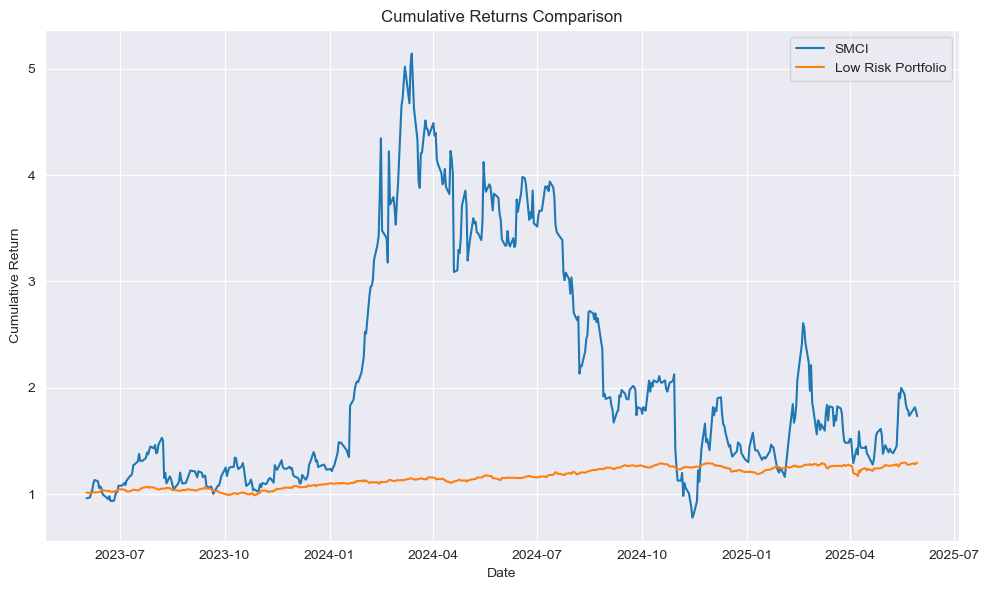

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(high_risk_cum_returns, label="SMCI")
plt.plot(low_risk_cum_returns, label="Low Risk Portfolio")
plt.title("Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('highvslowriskportfolios.png')
plt.show()

In [135]:
#lastly let's compare volatility and Sharpe ratios
#we modify the portfolio function to return all 3 metrics

def portfolio_return(tickers, weights, start, end):
    data = yf.download(tickers, start=start, end=end)
    close = data['Close']
    close = close.dropna()
    normalized_returns = close/close.iloc[0]-1 #moves stock prices to a start of 0

    #calculate daily returns
    daily_returns = close.pct_change().dropna()

    weights = np.array(weights)
    portfolio_daily_returns = daily_returns.dot(weights)
    
    #cumulative
    cumulative_returns = (1 + portfolio_daily_returns).cumprod()

    #annualized return
    avg_daily_return = portfolio_daily_returns.mean()
    annualized_return = avg_daily_return * 252

    #annualized volatility
    volatility = portfolio_daily_returns.std() * np.sqrt(252)

    #sharpe ratio (assume risk free rate = 0)
    sharpe_ratio = annualized_return / volatility

    return cumulative_returns, annualized_return, volatility, sharpe_ratio

In [136]:
high_cum, high_ann, high_vol, high_sharpe = portfolio_return(high_risk_tickers, high_risk_weight, start_date, end_date)

low_cum, low_ann, low_vol, low_sharpe = portfolio_return(low_risk_tickers, optimal_weights, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  11 of 11 completed


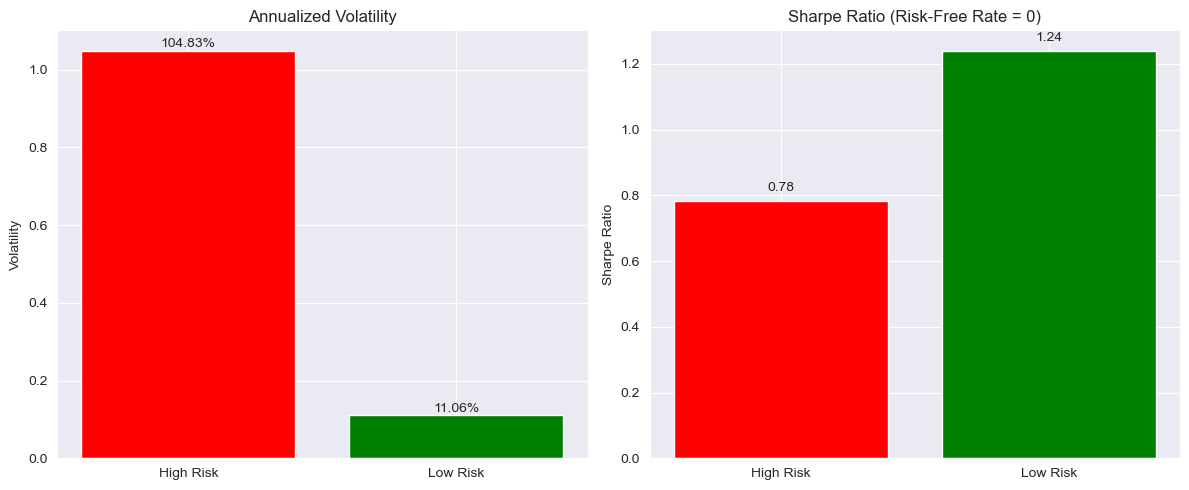

In [137]:
labels = ['High Risk', 'Low Risk']
vols = [high_vol, low_vol]
sharpes = [high_sharpe, low_sharpe]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# volatility bar chart
ax[0].bar(labels, vols, color=['red', 'green'])
ax[0].set_title("Annualized Volatility")
ax[0].set_ylabel("Volatility")
for i, v in enumerate(vols):
    ax[0].text(i, v + 0.002, f"{v:.2%}", ha='center', va='bottom')

# sharpe ratio bar chart
ax[1].bar(labels, sharpes, color=['red', 'green'])
ax[1].set_title("Sharpe Ratio (Risk-Free Rate = 0)")
ax[1].set_ylabel("Sharpe Ratio")
for i, v in enumerate(sharpes):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()